# Lets Grow More

<b>Data Science and Analytics Intern

<b>Author: Km Varsha

<b>Task 3: Prediction using Decision Tree Classifier

<b>In this task, we will do the Iris Data classification using Decision Tree Classifier algorithm and visualize it graphically.

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('Iris_decision.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
df.duplicated().values.any()

False

In [9]:
df.shape

(150, 6)

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Univariate Analysis

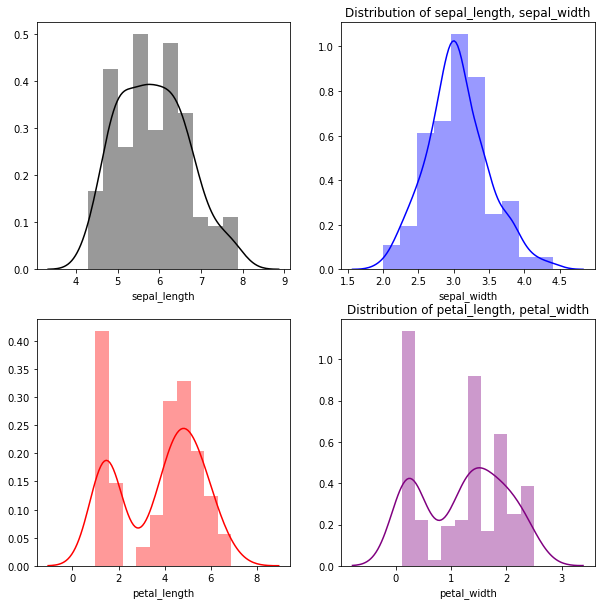

In [12]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplot(221)
sns.distplot(df['SepalLengthCm'],kde=True,color='black',bins=10)
plt.xlabel('sepal_length')

plt.subplot(222)
sns.distplot(df['SepalWidthCm'],kde=True,color='blue',bins=10)
plt.xlabel('sepal_width')

plt.title('Distribution of sepal_length, sepal_width')

plt.subplot(223)
sns.distplot(df['PetalLengthCm'],kde=True,color='red',bins=10)
plt.xlabel('petal_length')

plt.subplot(224)
sns.distplot(df['PetalWidthCm'],kde=True,color='purple',bins=10)
plt.xlabel('petal_width')

plt.title('Distribution of petal_length, petal_width')
plt.show()

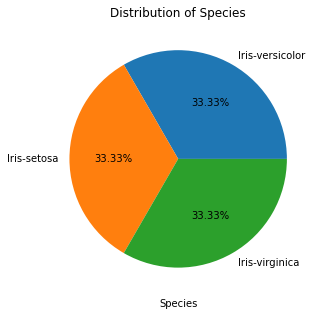

In [45]:
plt.rcParams['figure.figsize'] = (5,5)
plt.subplot()
plt.pie(df['Species'].value_counts().values,labels=df['Species'].value_counts().index,autopct='%1.2f%%')
plt.xlabel('Species')

plt.title('Distribution of Species')
plt.show()

Observation:

1-Here variable"Sepal length" and " Sepal width" are approximately following the empirical rule formula, but "petal length"and "petal width" do not, may they have outliers.

2-There are three categories in the dependent variable, which is approximately having equal number of values.

Bivariate Analysis

In [14]:
data = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

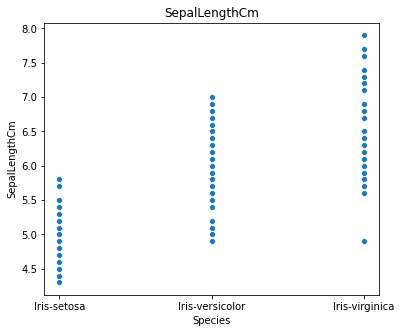

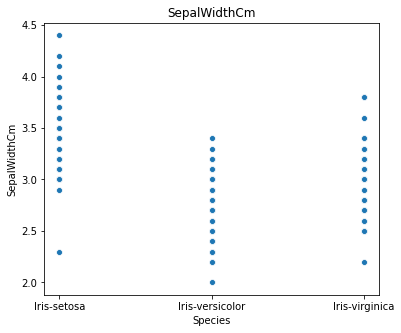

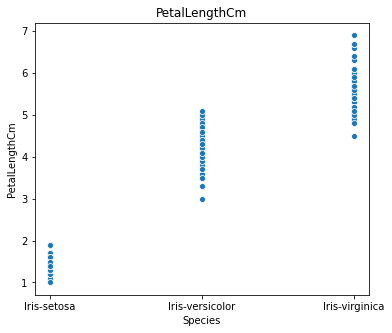

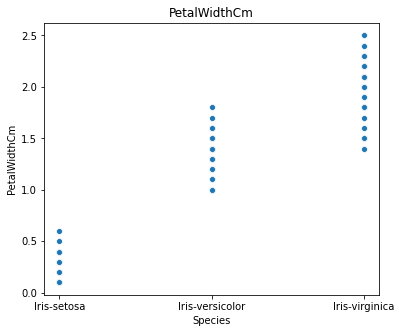

In [15]:
for feature in data:
    plt.rcParams['figure.figsize'] = (6,5)
    sns.scatterplot(x="Species",y=feature,data=df, palette="mako")
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Observation:
1- Each category of dependent variable falls in a specific range of values of every independent varibles. 

Outliers

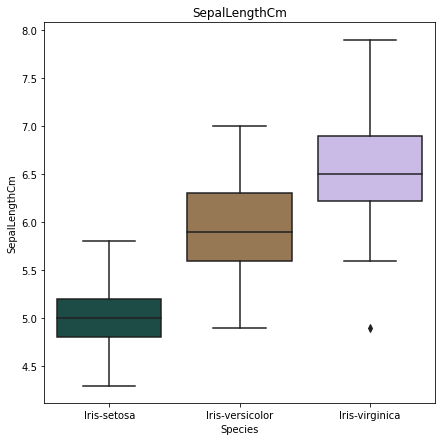

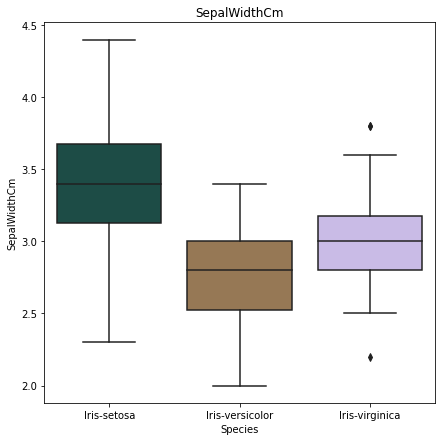

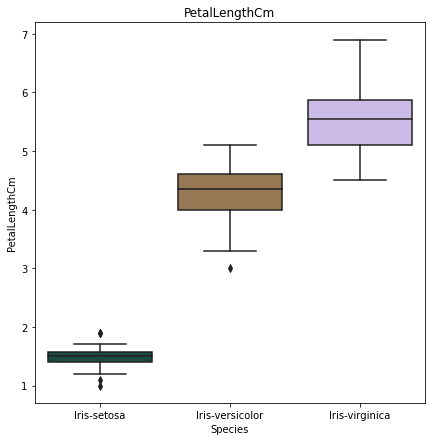

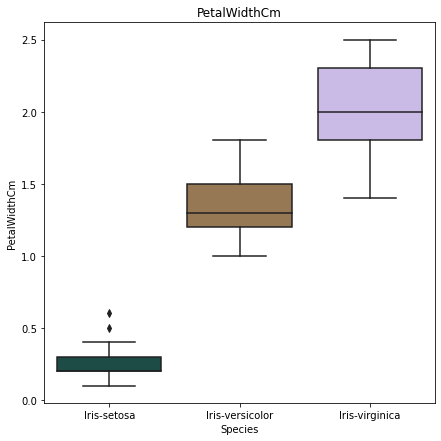

In [16]:
for feature in data:
    
    plt.rcParams['figure.figsize'] = (7,7)
    sns.boxplot(x='Species',y=feature,data=df,palette="cubehelix")
    plt.xlabel('Species')
    plt.title(feature)
    plt.show()

Observation:
1- As, we can see that here is very less amount of outliers, so we can ignore them.

Multivariate Analysis

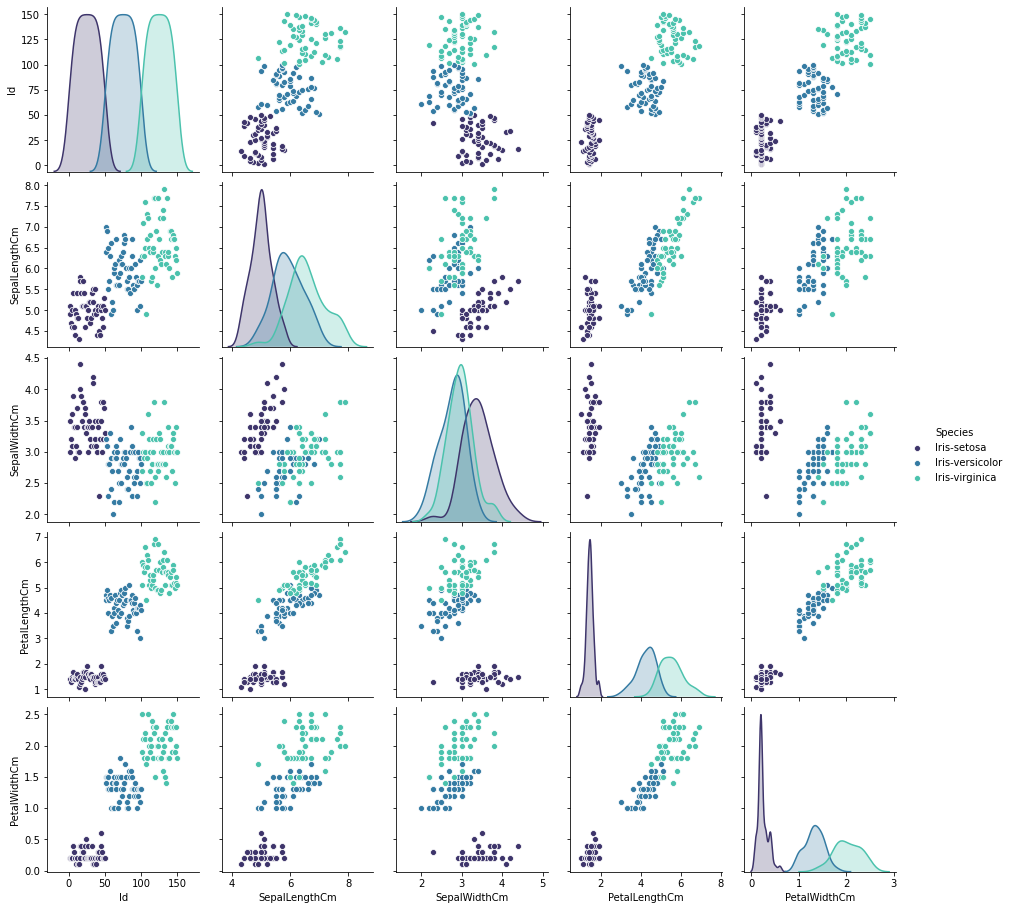

In [42]:
sns.pairplot(df, hue= 'Species',palette= 'mako')

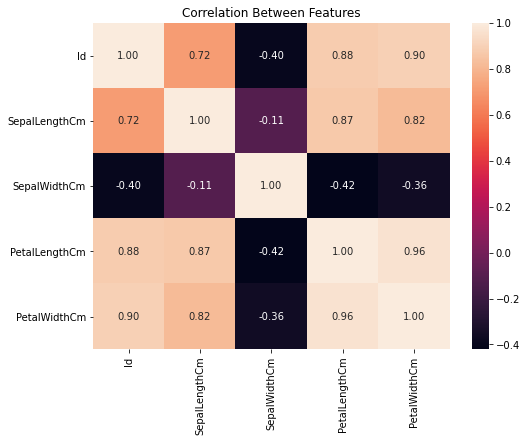

In [18]:
# Correlation
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Between Features")
plt.show()

Observation: Here, we can see that except few features most of the features are highly correlated.

In [19]:
x = df.iloc[:,1:5].values
y = df.iloc[:,5].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

Decision Tree Classifier

In [21]:
# Build a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(x_train, y_train)

model = classifier.predict(x_test)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


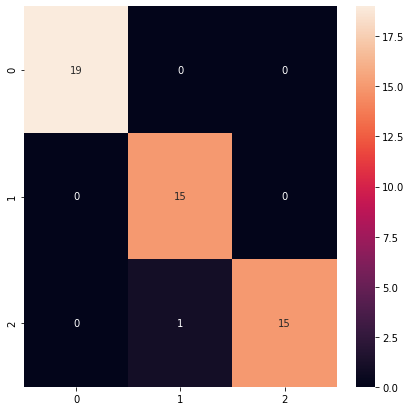

In [22]:
cm = confusion_matrix(y_test, model)
print(cm)

sns.heatmap(cm, annot=True);

In [23]:
print(accuracy_score(y_test, model))

0.98


In [24]:
predict = cross_val_predict(estimator = classifier, X = x_train, y = y_train, cv = 5)
print("Classification Report: \n",classification_report(y_train, predict))

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.89      0.89      0.89        35
 Iris-virginica       0.88      0.88      0.88        34

       accuracy                           0.92       100
      macro avg       0.92      0.92      0.92       100
   weighted avg       0.92      0.92      0.92       100



Plotting the Decision Tree Classifier Algorithm

In [27]:
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
species = ['Setosa','Versicolor','virginica']

[Text(513.825, 858.1114285714286, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]\nclass = Versicolor'),
 Text(434.7750000000001, 726.0942857142858, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Setosa'),
 Text(592.8750000000001, 726.0942857142858, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]\nclass = Versicolor'),
 Text(395.25000000000006, 594.0771428571429, 'PetalLengthCm <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = Versicolor'),
 Text(316.20000000000005, 462.06, 'PetalWidthCm <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = Versicolor'),
 Text(158.10000000000002, 330.0428571428571, 'PetalLengthCm <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Versicolor'),
 Text(79.05000000000001, 198.02571428571423, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Versicolor'),
 Text(237.15000000000003, 198.02571428571423, 'SepalWidthCm <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0,

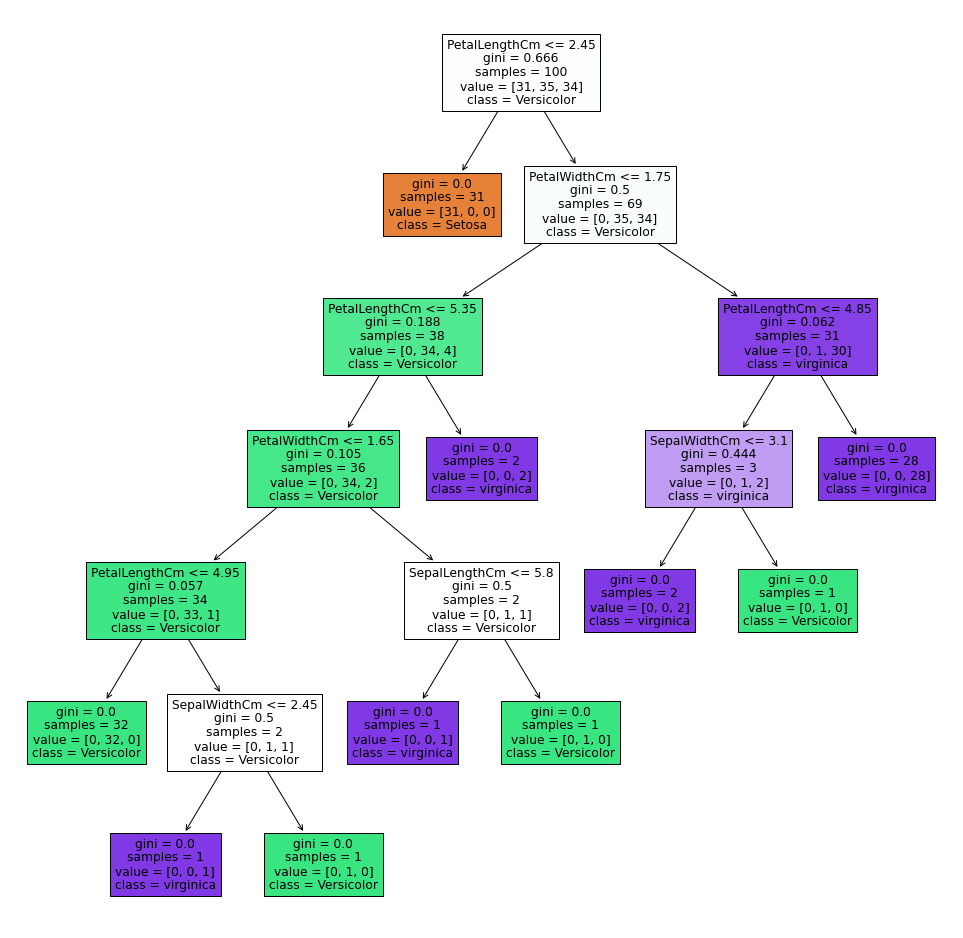

In [39]:
from sklearn.tree import plot_tree
from sklearn import tree
plt.figure(figsize = (17,17))
plot_tree(classifier,feature_names= feature, class_names = species, filled = True)

# Thank you